## Notebook demonstrating weather forecast data access using the Pylaski api

The <a href = "https://doi.org/10.1016/j.procs.2017.05.174">pylaski api</a> provides access to a variety of data from cameras, weather stations, and weather forecasts in California.  This notebook will focus on weather forecast data.

There are multiple weather forecast models ("sources") and each has its own set of variables and timesteps.

This notebook references multiple weather <a href = "https://wxmap.sdsc.edu/">forecast models</a> such as: 

- <a href = "https://wifire-data.sdsc.edu/dataset/sdge-op-ensemble-gfs-001-wrf">SDGE GFS 001 (6 km)</a>   
- <a href = "https://wifire-data.sdsc.edu/dataset/sdge-op-ensemble-gfs-002-wrf">SDGE GFS 002 (2 km)</a>    
- <a href = "https://wifire-data.sdsc.edu/dataset/sdge-op-ensemble-gfs-003-wrf">SDGE GFS 003 (2 km)</a>  
- <a href = "https://wifire-data.sdsc.edu/dataset/sdge-op-ensemble-nam-001-wrf">SDGE NAM 001 (2 km)</a>
- <a href = "https://wifire-data.sdsc.edu/dataset/sdg-e-operational-ensemble-nam-002-wrf">SDGE NAM 002 (2 km)</a>
- <a href = "https://www.ncei.noaa.gov/products/weather-climate-models/global-forecast">NWS GFS 0.25 Degree</a>
- <a href = "https://wifire-data.sdsc.edu/dataset/high-resolution-rapid-refresh-hrrr">NWS HRRR (3 km)</a>
- <a href = "https://wifire-data.sdsc.edu/dataset/national-digital-forecast-database-ndfd">NWS NDFD (2.5 km)</a>




<h3>TABLE OF CONTENTS:</h3>
<ol><a href='#metadata'><li>All forecast models and associated variables available through Pylaski</li></a>
    <a href='#1model_1var'><li>Timeseries forecast at a specific lat/lon for 1 model and 1 variable</li></a>
    <a href='#2var_2_models'><li>timeseries forecast at a specific lat/lon for 2 models and 2 variables</li></a>
    <a href='#weather_station'><li>Getting weather station data¶</li></a>
        


In [1]:
import requests, json, pprint
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

<a id='metadata'><h3>forecast metadata shows all forecast models and associated variables available through Pylaski</h3></a>

In [2]:
url = 'https://sdge.sdsc.edu/pylaski/forecast/metadata?source=all'
r = requests.get(url)   
metadata = r.json()     
df=pd.DataFrame(metadata) 
df

,ndfd,gfs25,hrrr,sdge_ens_gfs_001_wrf,sdge_ens_gfs_001_dfmnfdrs,sdge_ens_gfs_002_wrf,sdge_ens_gfs_003_wrf,sdge_ens_nam_001_wrf,sdge_ens_nam_001_dfmnfdrs,sdge_ens_nam_002_wrf
timesteps,"[2021121008, 2021121218, 2021121102, 202112121...","[2021120918, 2021120919, 2021120920, 202112092...","[202112100945, 202112101530, 202112101015, 202...","[2021121413, 2021121218, 2021121313, 202112170...","[2021121413, 2021121218, 2021121313, 202112170...","[2021121008, 2021121218, 2021121302, 202112130...","[2021121008, 2021121302, 2021121218, 202112130...","[2021121008, 2021121218, 2021120919, 202112100...","[2021121008, 2021121003, 2021120919, 202112100...","[2021121008, 2021121218, 2021120919, 202112100..."
variables,"[air_temperature_2m, 10m_wind_direction, 10m_w...","[air_temperature_2m, 10m_wind_direction, 10m_w...","[10m_wind_direction, air_temperature_2m, 10m_w...","[hourly_precipitation_amount, accumulated_snow...","[ignition_component, mean_wtd_moisture_1hr, bu...","[hourly_precipitation_amount, hourly_snow_dept...","[hourly_precipitation_amount, accumulated_snow...","[hourly_precipitation_amount, accumulated_snow...","[ignition_component, mean_wtd_moisture_1hr, bu...","[hourly_precipitation_amount, accumulated_snow..."


<a id='1model_1var'><h3>example 1) timeseries forecast at a specific lat/lon for 1 model and variable</h3></a>

Let's consider
- location (lat=32.61392993783565 & lon=-116.60064697265625)
- model (source=sdge_ens_nam_001_wrf)
- variable (obs=air_temperature_925mb)   --note, this is air temperature at 925 millibar pressure surface

In [3]:
# enter lat/lon, source (model), and obs (variable) into the url string

baseURL='https://sdge.sdsc.edu/pylaski/forecast?'

lat = 32.61392993783565
lon = -116.60064697265625
variable='air_temperature_925mb'
model='sdge_ens_nam_001_wrf'

selectionParameters = "&lat=%s&lon=%s&&source=%s&obs=%s" % (str(lat),str(lon),model,variable)

url = baseURL + selectionParameters

#url = 'https://sdge.sdsc.edu/pylaski/forecast?lat=32.61392993783565&lon=-116.60064697265625&source=sdge_ens_nam_001_wrf&obs=air_temperature_925mb'
url

'https://sdge.sdsc.edu/pylaski/forecast?&lat=32.61392993783565&lon=-116.60064697265625&&source=sdge_ens_nam_001_wrf&obs=air_temperature_925mb'

In [4]:
r = requests.get(url)  # Request to GET information from the given URL 
r_json = r.json()      # Extract JSON object from data returned on GET request

pprint.pprint(r_json['features'][0])     

{'geometry': {'coordinates': [-116.60064697265625, 32.61392993783565],
              'type': 'Point'},
 'properties': {'air_temperature_925mb': [9.0,
                                          10.0,
                                          10.0,
                                          9.0,
                                          10.0,
                                          9.0,
                                          None,
                                          None,
                                          None,
                                          None,
                                          None,
                                          None,
                                          8.0,
                                          7.0,
                                          7.0,
                                          7.0,
                                          7.0,
                                          6.0,
                                          

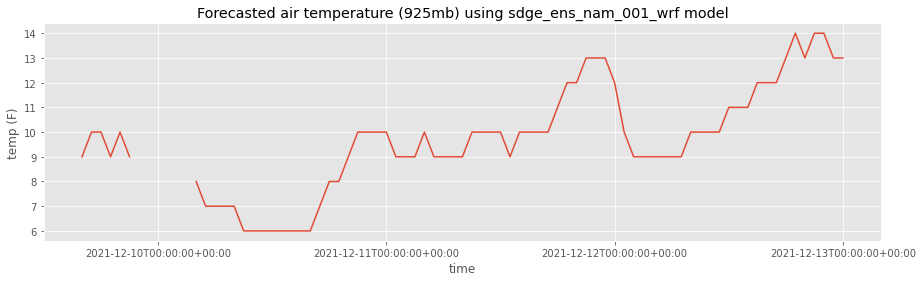

In [5]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,4))

time = r_json['features'][0]['properties']['timestamp']
temp = r_json['features'][0]['properties']['air_temperature_925mb']

ax.plot(time,temp)
ax.set_xlabel('time')
ax.set_ylabel('temp (F)')
ax.set_title('Forecasted air temperature (925mb) using sdge_ens_nam_001_wrf model')
ax.set_xticks(['2021-12-10T00:00:00+00:00','2021-12-11T00:00:00+00:00','2021-12-12T00:00:00+00:00','2021-12-13T00:00:00+00:00']);

<a id='2var_2_models'><h3>example 2) timeseries for 2 variables from 2 models</h3></a>

In [6]:
# enter lat/lon, source (model), and obs (variable) into the url string

baseURL='https://sdge.sdsc.edu/pylaski/forecast?'

lat = 33.708347493688414
lon = -116.58691406250001
variables = 'air_temperature_2m,relative_humidity_2m'
models = 'sdge_ens_gfs_002_wrf,ndfd'

selectionParameters = "&lat=%s&lon=%s&&source=%s&obs=%s" % (str(lat),str(lon),models,variables)

url = baseURL + selectionParameters

#url = 'https://sdge.sdsc.edu/pylaski/forecast?lat=33.708347493688414&lon=-116.58691406250001&source=sdge_ens_gfs_002_wrf,ndfd&obs=air_temperature_2m,relative_humidity_2m'
url

'https://sdge.sdsc.edu/pylaski/forecast?&lat=33.708347493688414&lon=-116.58691406250001&&source=sdge_ens_gfs_002_wrf,ndfd&obs=air_temperature_2m,relative_humidity_2m'

In [7]:
r = requests.get(url)  # Request to GET information from the given URL 
r_json = r.json()      # Extract JSON object from data returned on GET request

pprint.pprint(r_json['features'])     

[{'geometry': {'coordinates': [-116.58691406250001, 33.708347493688414],
               'type': 'Point'},
  'properties': {'air_temperature_2m': [43.0,
                                        43.0,
                                        44.0,
                                        46.0,
                                        47.0,
                                        44.0,
                                        44.0,
                                        44.0,
                                        41.0,
                                        41.0,
                                        40.0,
                                        39.0,
                                        40.0,
                                        39.0,
                                        39.0,
                                        40.0,
                                        41.0,
                                        39.0,
                                        40.0,
                    

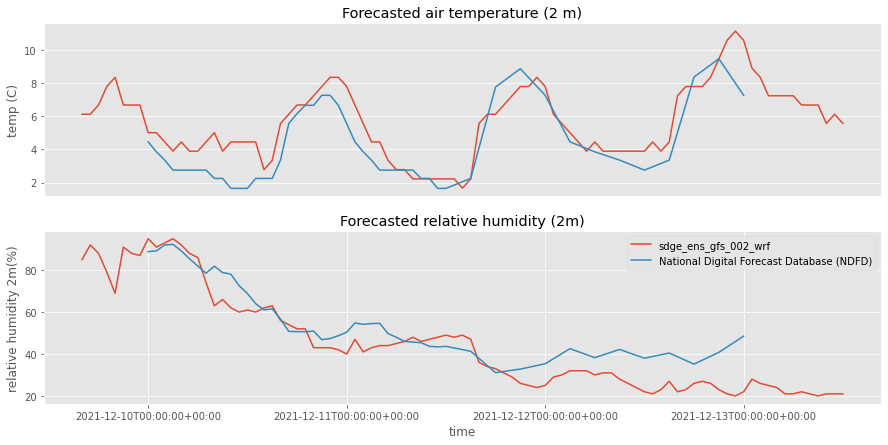

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,7))

# sdge_ens_gfs_002_wrf
time_sdge = r_json['features'][0]['properties']['timestamp']
temp_sdge = r_json['features'][0]['properties']['air_temperature_2m']
temp_sdge_celsius = [(x - 32)*(5/9) for x in temp_sdge]  #convert to celsius from F
rel_humidity_sdge = r_json['features'][0]['properties']['relative_humidity_2m']

# NOAA NWS National Digital Forecast Database (NDFD)
time_ndfd = r_json['features'][1]['properties']['timestamp']
temp_ndfd = r_json['features'][1]['properties']['air_temperature_2m']
rel_humidity_ndfd = r_json['features'][1]['properties']['relative_humidity_2m']

ax[0].plot(time_sdge,temp_sdge_celsius, label='sdge_ens_gfs_002_wrf')
ax[0].plot(time_ndfd,temp_ndfd, label='National Digital Forecast Database (NDFD)')
#ax[0].set_xlabel('time')
ax[0].set_ylabel('temp (C)')
#ax[0].legend()
ax[0].set_title('Forecasted air temperature (2 m)')
#ax[0].set_xticks(['2021-12-10T00:00:00+00:00','2021-12-11T00:00:00+00:00','2021-12-12T00:00:00+00:00','2021-12-13T00:00:00+00:00'])
ax[0].set_xticks([])
#ax[0].set_xlabel([])


ax[1].plot(time_sdge,rel_humidity_sdge, label='sdge_ens_gfs_002_wrf')
ax[1].plot(time_ndfd,rel_humidity_ndfd, label='National Digital Forecast Database (NDFD)')
ax[1].set_xlabel('time')
ax[1].set_ylabel('relative humidity 2m(%)')
ax[1].legend()
ax[1].set_title('Forecasted relative humidity (2m)')
ax[1].set_xticks(['2021-12-10T00:00:00+00:00','2021-12-11T00:00:00+00:00','2021-12-12T00:00:00+00:00','2021-12-13T00:00:00+00:00']);



<a id='weather_station'><h3>example 3) getting weather station data</h3></a>

### For example, let's say in preparation for running a fire model in Yosemite Valley, we want to forecast the following:

- wind speed, 
- wind direction, 
- relative humidity, 
- dead fuel moisture 10 hr, 
- and air temperature 



In [9]:
# enter lat/lon, source (model), and obs (variable) into the url string


baseURL='https://firemap.sdsc.edu/pylaski/stations/data?'

selectionType = "selection=withinRadius"
#selectionType = "selection=closestTo"

lat = 37.72876790191959
lon = -119.61807510738193
radius = 10

## 10 km radius 
selectionParameters = "&lat=%s&lon=%s&radius=%s" % (str(lat),str(lon),str(radius))
## Fill in parameters to append to the URL
observables = "&observable=temperature&observable=wind_speed&observable=wind_direction&observable=relative_humidity&observable=fm_dead_10"


dateFrom='2021-12-08T12:20:30-08:00'
dateTo='2021-12-12T12:20:30-08:00'
            
dateURL = '&from=%s&to=%s' % (dateFrom,dateTo)

url= baseURL + selectionType + selectionParameters + observables + dateURL

#url =' https://firemap.sdsc.edu/pylaski/stations/data?selection=closestTo&lat=37.675333&lon=-119.787917&observable=temperature&observable=relative_humidity&observable=wind_speed&observable=wind_gust&observable=wind_direction&observable=fm_dead_10&from=2021-12-08T12:20:30-08:00&to=2021-12-12T12:20:30-08:00'

url

'https://firemap.sdsc.edu/pylaski/stations/data?selection=withinRadius&lat=37.72876790191959&lon=-119.61807510738193&radius=10&observable=temperature&observable=wind_speed&observable=wind_direction&observable=relative_humidity&observable=fm_dead_10&from=2021-12-08T12:20:30-08:00&to=2021-12-12T12:20:30-08:00'

In [10]:
r = requests.get(url)  # Request to GET information from the given URL 
r_json = r.json()      # Extract JSON object from data returned on GET request

pprint.pprint(r_json)     

{'features': [{'geometry': {'coordinates': [-119.58944, 37.74972],
                            'type': 'Point'},
               'properties': {'description': {'id': '3187',
                                              'name': 'YOSEMITE VALLEY NEAR '
                                                      'YOSEMITE VILLAGE 1NNW '
                                                      '(YYV)',
                                              'provider': 'Mesowest',
                                              'wifire_uid': 'mesowest_yyvc1'},
                              'distanceFromLocation': {'units': 'km',
                                                       'value': 3.3515318268484813},
                              'temperature': [55.0,
                                              55.0,
                                              55.0,
                                              55.0,
                                              55.0,
                                           

**references:**
 
- Forecast visualization map: https://wxmap.sdsc.edu/
- pylaski api reference: https://doi.org/10.1016/j.procs.2017.05.174
- SDGE models: https://wifire-data.sdsc.edu/organization/sdge
- NWS GFS: https://www.ncei.noaa.gov/products/weather-climate-models/global-forecast
- NWS HRRR: https://wifire-data.sdsc.edu/dataset/high-resolution-rapid-refresh-hrrr
- NWS NDFD: https://wifire-data.sdsc.edu/dataset/national-digital-forecast-database-ndfd